# College and Career

What is the expected networth 10 years after graduating CU Boulder and CU Denver including the tuition to graduate

The random variables I am tracking is the expected tuition, expected earnings, chance of graduating, which school the student is attending, acceptance rate of the schools, having a job in school.

I will be running 10000 trials that will involve the character in different financial situations as well as GPA and chance for scholarships.

The outcome I am measuring is the expected tuition for both college in order to support a career in data science.

A possible bias in my data could be that theres a 50% chance of choosing either school which isn't realistic compared to the amount of students that go to both as well as a 40% chance the student has a minimum wage job while in college to help them make money.

#### Background information

The university of colorado boulder has a 73% graduation rate with a median debt total of 19,687 Median earnings of 122,521 after 5 years acceptance rate is 83.3%

The university of colorado denver has a 49% graduation rate with a median debt total of 20,500. Median earnings of 95,300 after 5 years acceptance rate is 77.8%

In [2]:
import random
import numpy as np

# Numbers of Students
num_simulations = 10000

# School data
schools = {
    "CU Boulder": {
        "graduation_rate": 0.73,
        "median_debt": 19687,
        "earnings_5yr": 122521
    },
    "CU Denver": {
        "graduation_rate": 0.49,
        "median_debt": 20500,
        "earnings_5yr": 95300
    }
}

results = {"CU Boulder": [], "CU Denver": []}

for _ in range(num_simulations):
    # Randomly choose school
    chosen_school = random.choice(list(schools.keys()))
    data = schools[chosen_school]

    # Determine if student graduates
    graduates = random.random() < data["graduation_rate"]

    # Tuition cost (debt)
    if graduates:
        tuition_cost = data["median_debt"]
    else:
        tuition_cost = data["median_debt"] * 0.5  # assume they pay half if they drop out

    results[chosen_school].append(tuition_cost)

# Compute expected tuition for each school
expected_tuition = {
    school: np.mean(costs)
    for school, costs in results.items()
}

print("🎓 Expected Tuition to Graduate (simulated):")
for school, tuition in expected_tuition.items():
    print(f"{school}: ${tuition:,.2f}")


🎓 Expected Tuition to Graduate (simulated):
CU Boulder: $17,051.03
CU Denver: $15,291.05


In [5]:
# Parameters
num_simulations = 10000

schools = {
    "CU Boulder": {
        "graduation_rate": 0.73,
        "acceptance_rate": 0.833,
        "median_debt": 19687,
        "earnings_5yr": 122521
    },
    "CU Denver": {
        "graduation_rate": 0.49,
        "acceptance_rate": 0.778,
        "median_debt": 20500,
        "earnings_5yr": 95300
    }
}

try:
    results
except NameError:
    results = {school: [data["median_debt"]] * num_simulations for school, data in schools.items()}

# Job-in-school probability and income
job_prob = 0.4  # 40% chance student has a job in college
job_income = 12.5 * 20 * 52 * 4  # total income during school based on minimum wage for a part time job assuming 20 hour worked a week

networth_results = {"CU Boulder": [], "CU Denver": []}

for _ in range(num_simulations):
    chosen_school = random.choice(list(schools.keys()))
    data = schools[chosen_school]

    # Determine acceptance
    accepted = random.random() < data["acceptance_rate"]
    if not accepted:
        continue 
        
    # Get random tuition from previous simulation
    tuition_cost = random.choice(results[chosen_school])

    # Determine if student graduates
    graduates = random.random() < data["graduation_rate"]

    # Estimate earnings after 10 years
    earnings_10yr = data["earnings_5yr"] * 2
    if not graduates:
        earnings_10yr *= 0.5  # less earning potential if dropout

    # Add job income if applicable
    if random.random() < job_prob:
        earnings_10yr += job_income

    # Net worth = earnings over 10 years minus tuition debt
    networth = earnings_10yr - tuition_cost

    networth_results[chosen_school].append(networth)

# Expected net worth per school
expected_networth = {
    school: np.mean(values) for school, values in networth_results.items()
}

print("💰 Expected Net Worth After 10 Years (including tuition):")
for school, worth in expected_networth.items():
    print(f"{school}: ${worth:,.2f}")


💰 Expected Net Worth After 10 Years (including tuition):
CU Boulder: $215,875.73
CU Denver: $148,216.61


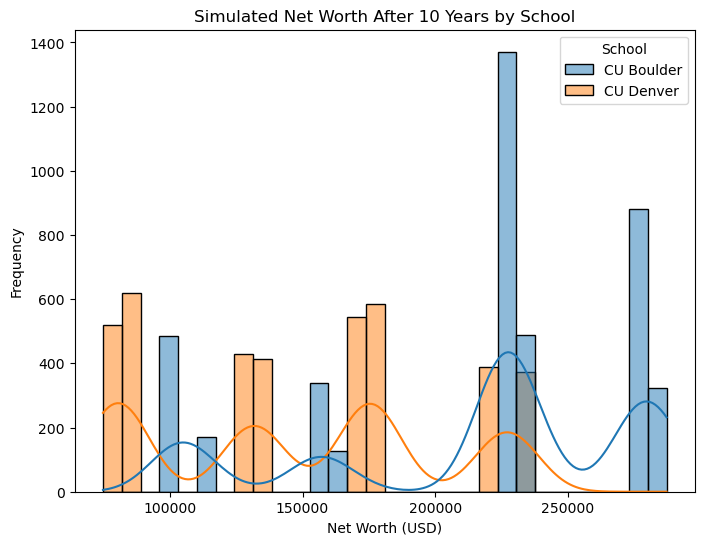

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert simulation results to a DataFrame
data = []
for school, worths in networth_results.items():
    for w in worths:
        data.append({"School": school, "Net_Worth": w})

df_networth = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8,6))
sns.histplot(data=df_networth, x="Net_Worth", hue="School", kde=True, bins=30)
plt.title("Simulated Net Worth After 10 Years by School")
plt.xlabel("Net Worth (USD)")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Calculate standard deviation of net worth for each school
std_networth = {
    school: np.std(values, ddof=1)  # ddof=1 gives sample standard deviation
    for school, values in networth_results.items()
}

print("📈 Standard Deviation of Net Worth (10 Years After Graduation):")
for school, std in std_networth.items():
    print(f"{school}: ${std:,.2f}")

📈 Standard Deviation of Net Worth (10 Years After Graduation):
CU Boulder: $59,661.13
CU Denver: $53,646.25


### Conculsion:

Based on 10,000 simulations of a student (dropped out or not), and 10,000 simulations for tuition, CU Boulder students are more likely to graduate making 215,000~ dollars, which leads to higher average tuition costs due to full debt repayment but higher amount of networth after 10 years. CU Denver, with a lower graduation rate, shows a greater proportion of students paying only partial tuition, resulting in a lower average cost but students because of lower acceptance on average will make 148,000~ dollars. The final simulated expected tuition values was about 17,000~ for CU Boulder and 15,000~ for CU Denver. The standard deviation for CU Boulder is higher at 59,000~ vs CU denver at 53000~
